In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("D:/Microsoft Data Engineer/Graduation Project/Database/SalesSummary.csv")

print(data.head())


   CustomerID         Country  InvoiceNo              InvoiceDate StockCode  \
0       13426  United Kingdom     579439  2011-11-29 13:29:00.000     20914   
1       14388  United Kingdom     579440  2011-11-29 13:32:00.000     23580   
2       14388  United Kingdom     579440  2011-11-29 13:32:00.000     23581   
3       14388  United Kingdom     579440  2011-11-29 13:32:00.000     22411   
4       14388  United Kingdom     579440  2011-11-29 13:32:00.000     23202   

                           Description  UnitPrice  Quantity  TotalPrice  \
0  SET/5 RED RETROSPOT LID GLASS BOWLS       2.55        32        81.6   
1            SNACK TRAY HAPPY FOREST         1.95         8        15.6   
2               JUMBO BAG PAISLEY PARK       1.79        10        20.8   
3    JUMBO SHOPPER VINTAGE RED PAISLEY       1.95        10        20.8   
4               JUMBO BAG VINTAGE LEAF       2.08        10        20.8   

   TotalItemPrice  
0            81.6  
1            15.6  
2            1

C:\Users\basse\AppData\Local\Temp\ipykernel_18304\478310144.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


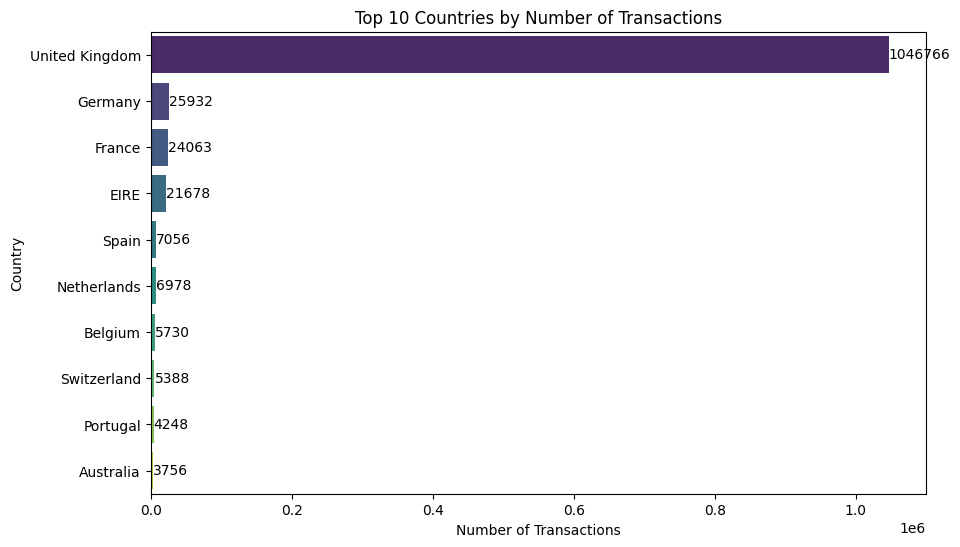

In [2]:
country_counts = data['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
for index, value in enumerate(country_counts.values):
    plt.text(value + 100, index, str(value), color='black', va="center")

plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.show()

C:\Users\basse\AppData\Local\Temp\ipykernel_18304\1483115456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='Blues_r')


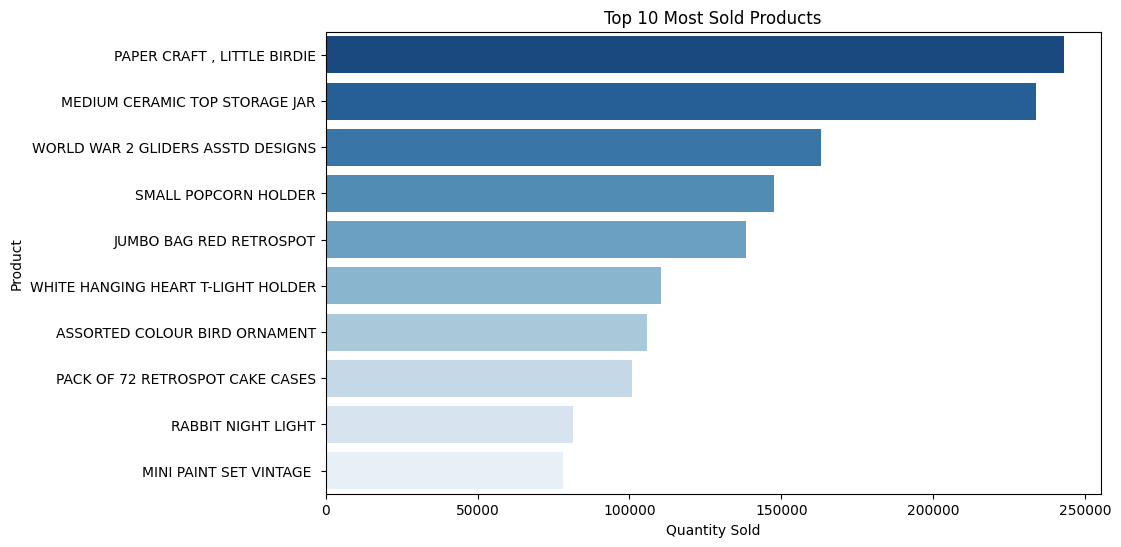

In [3]:
#Top 10 Most Sold Products & Qty
top_10_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette='Blues_r')

plt.title('Top 10 Most Sold Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

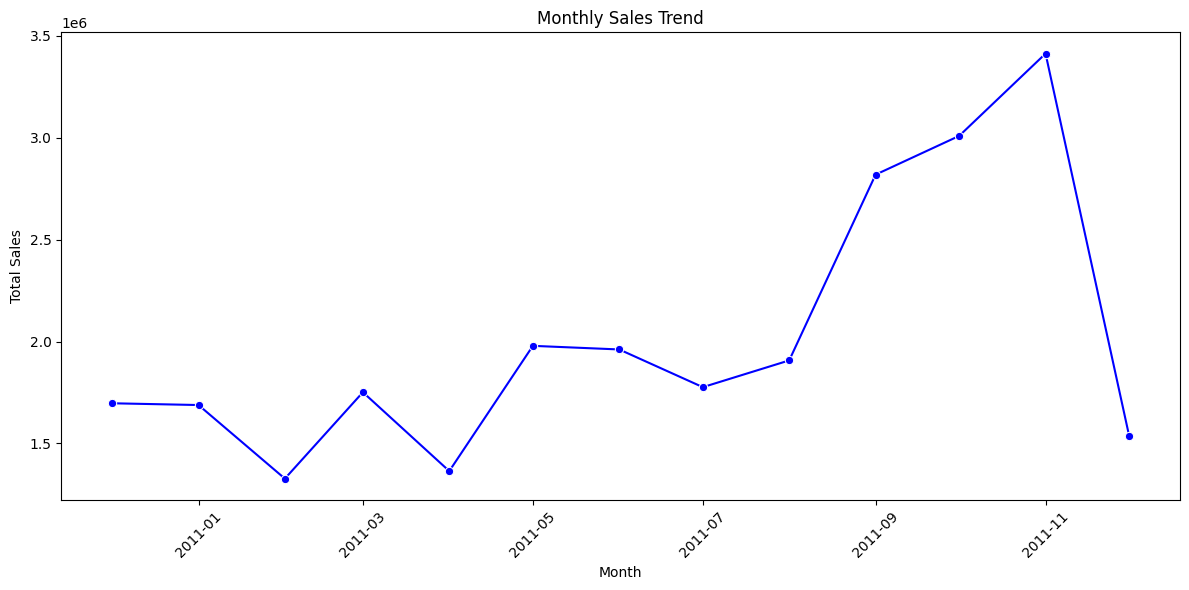

In [4]:
#Make InvoiceDate is a date-time object
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

#Create a Year-Month
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

#Group by Year-Month and calculate total sales
monthly_sales = data.groupby('YearMonth')['TotalPrice'].sum().reset_index()

#Convert the 'YearMonth' to date-time for proper plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='TotalPrice', data=monthly_sales, marker='o', color='blue')

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


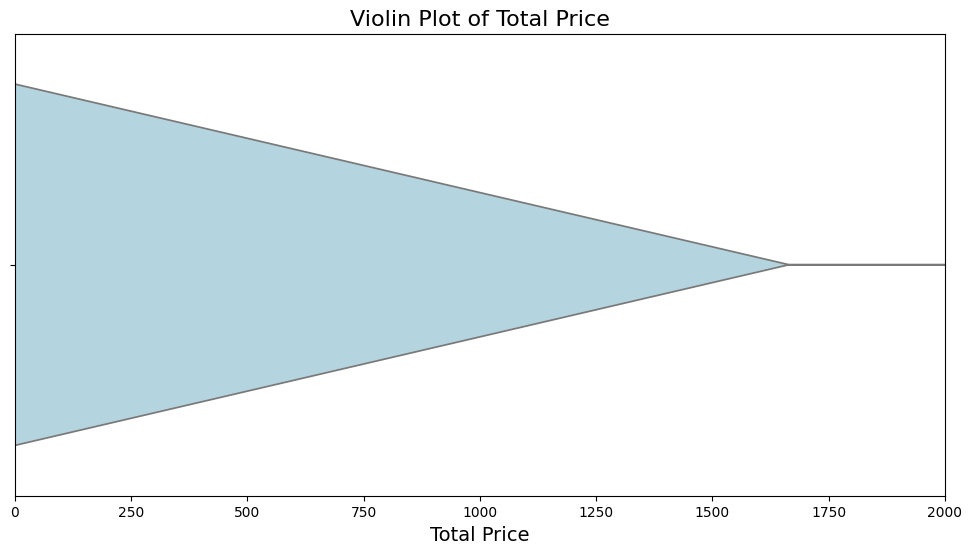

In [5]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=data['TotalPrice'], inner=None, color='lightblue')

plt.xlim(0, 2000)

plt.title('Violin Plot of Total Price', fontsize=16)
plt.xlabel('Total Price', fontsize=14)

plt.show()